# Elastic Net Regression

**Elastic Net Regression** is a regularization technique that combines 
the strengths of both **Ridge Regression (L2)** and **Lasso Regression (L1)**.

It adds both penalties to the cost function to balance:
- Ridge’s ability to handle multicollinearity, and
- Lasso’s ability to perform feature selection.


## 🎯 Intuition

Elastic Net is designed to overcome the limitations of Ridge and Lasso:

| Problem | Ridge | Lasso | Elastic Net |
|----------|--------|--------|--------------|
| Overfitting | ✅ Handles | ✅ Handles | ✅ Handles |
| Feature Selection | ❌ | ✅ | ✅ |
| Correlated Features | ✅ Keeps together | ❌ Arbitrary selection | ✅ Keeps together |

So, Elastic Net **shrinks coefficients** like Ridge,  
and **sets some to zero** like Lasso — depending on the parameters.


## 🧮 Mathematical Formula

The cost function of Elastic Net is:

J = ∑ (yi​−yi​^​)2 + λ1 ​∑ ∣ βj​ ∣ + λ2​ ∑ (βj)^2​

Or in a simpler, combined form (used in scikit-learn):

J = ∑ (yi​−yi​^​)2 + λ [ α ∑ ∣ βj ∣ + (1−α) ∑ (βj)^2​]

Where:
- λ → overall regularization strength
- 𝛼 → mixing parameter between Lasso and Ridge  
  - α = 1 → Pure Lasso  
  - α = 0 → Pure Ridge  
  - 0 < α < 1 → Elastic Net


In [3]:
# 📦 Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso

In [4]:
# 🧩 Generate Data
np.random.seed(42)
X = np.random.randn(100, 5)
y = 3*X[:,0] + 1.5*X[:,1] + np.random.randn(100)  # Only first two features are important

In [5]:
# ⚙️ Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # α=1.0 (overall strength), l1_ratio=0.5 (balance)
elastic_net.fit(X, y)

# For comparison
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

ridge.fit(X, y)
lasso.fit(X, y)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [6]:
# 🔍 Compare Coefficients
print("Ridge Coefficients:  ", np.round(ridge.coef_, 3))
print("Lasso Coefficients:  ", np.round(lasso.coef_, 3))
print("ElasticNet Coefficients:", np.round(elastic_net.coef_, 3))

Ridge Coefficients:   [ 3.011  1.612 -0.016  0.156 -0.011]
Lasso Coefficients:   [ 1.565  0.373  0.     0.    -0.   ]
ElasticNet Coefficients: [ 1.37   0.569  0.     0.    -0.   ]


f:\clg\Data Science\1-Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+02, tolerance: 9.370e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


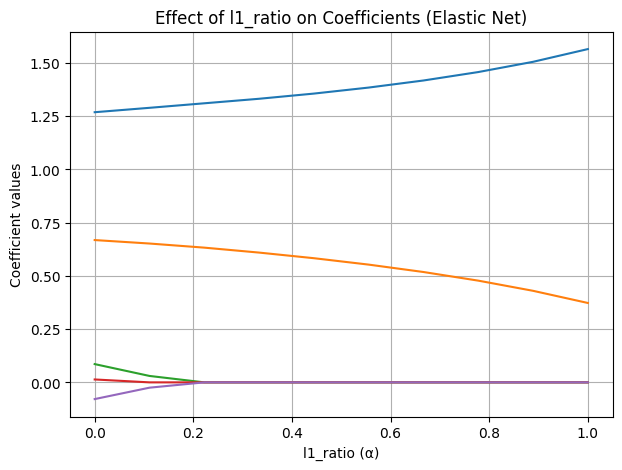

In [7]:
# 📊 Effect of l1_ratio on Coefficients
ratios = np.linspace(0, 1, 10)
coefs = []

for r in ratios:
    enet = ElasticNet(alpha=1.0, l1_ratio=r, max_iter=10000)
    enet.fit(X, y)
    coefs.append(enet.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(7,5))
plt.plot(ratios, coefs)
plt.xlabel("l1_ratio (α)")
plt.ylabel("Coefficient values")
plt.title("Effect of l1_ratio on Coefficients (Elastic Net)")
plt.grid(True)
plt.show()

## 🧠 How Elastic Net Works

- When **α (l1_ratio) → 0** → behaves like **Ridge** (only L2 penalty).  
- When **α → 1** → behaves like **Lasso** (only L1 penalty).  
- When **0 < α < 1** → a **blend** of both.

Thus, Elastic Net is a **compromise** between Ridge and Lasso:
it can perform feature selection *and* handle correlated predictors.


## ⚙️ When to Use Elastic Net

✅ Use when:
- You have **many features** and expect **correlations** among them.
- You want both **feature selection (L1)** and **stability (L2)**.
- Lasso is too aggressive and Ridge is too mild.

⚠️ Don’t use when:
- You know your data is purely linear and well-behaved (use Ridge or Linear Regression).

---

## 🧮 Formula Summary

| Model | Cost Function |
|--------|----------------|
| Ridge | \( J = \sum (y - \hat{y})^2 + \lambda \sum \theta^2 \) |
| Lasso | \( J = \sum (y - \hat{y})^2 + \lambda \sum |\theta| \) |
| Elastic Net | \( J = \sum (y - \hat{y})^2 + \lambda [\alpha \sum |\theta| + (1-\alpha) \sum \theta^2] \) |


## 🧩 In Simple Words

Elastic Net = Lasso + Ridge  
It’s like a **hybrid**:
- Shrinks coefficients like Ridge,
- Removes unnecessary ones like Lasso.

It gives the **best balance** when you have:
- **many correlated features**
- **noisy data**
- and need **both generalization + feature selection**.
